In [172]:
import pandas as pd
import csv
import sys
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import random
import math
import seaborn as sns

# **Classification**

In [173]:
data_LIWC = pd.read_csv('BaselineLIWC.csv')
data_LIWC.head()

,id,label,jml_follower,jml_following,mention,hastag,website,retweet,media_url,tanda_baca,...,Sum of musik5,Sum of keuangan5,Sum of metafisik5,Sum of kematian5,Sum of agama5,Sum of seksual5,Sum of makan/minum5,Sum of tidur5,Sum of penampilan5,Sum of umpatan5
0,1,Neuroticism,105,49,479,11,36,2,NaN,2106,...,"-0,22","1,24","-0,18","0,12","-0,06","0,36","-0,28","1,6",1.05,2.31
1,2,Neuroticism,208,3,35,1,0,0,NaN,23,...,"-0,02",0,0,0,0,0,0,"0,1",0.05,0.11
2,3,Extraversion,28,6,15,0,14,0,NaN,116,...,0,0,0,0,0,0,0,0,0,0
3,4,Neuroticism,12,5,4,0,0,0,NaN,11,...,0,0,0,0,0,0,0,0,0,0
4,5,Neuroticism,29,7,6,0,4,0,NaN,35,...,0,0,0,0,0,0,0,0,0.05,0


In [174]:
data_LIWC.isnull().values.any()
data_LIWC = data_LIWC.dropna()
data_LIWC.head()

,id,label,jml_follower,jml_following,mention,hastag,website,retweet,media_url,tanda_baca,...,Sum of musik5,Sum of keuangan5,Sum of metafisik5,Sum of kematian5,Sum of agama5,Sum of seksual5,Sum of makan/minum5,Sum of tidur5,Sum of penampilan5,Sum of umpatan5
33,34,Extraversion,164,230,504,9,52,63,136.0,64,...,-0.1,0.2,0,0.03,-0.3,0.03,-0.1,0.5,0.25,0.44
34,35,Extraversion,80,117,936,60,59,662,450.0,158,...,-0.06,0.28,-0.04,0.06,-0.18,0.06,-0.18,2.1,0.65,0.77
35,36,Extraversion,148,139,1051,163,106,589,188.0,293,...,-0.02,0.4,-0.04,0.09,-0.24,0,-0.03,0.3,0.6,1.1
36,37,Conscientiousness,275,269,427,9,69,35,85.0,121,...,-0.14,0.32,-0.03,0,-0.18,0,-0.03,1.3,0.25,0.22
37,38,Conscientiousness,41,68,53,0,1,6,12.0,22,...,-0.02,0.08,0,0,0,0,0,0.3,0.25,0


In [175]:
data_LIWC.dtypes

id                      int64
label                  object
jml_follower            int64
jml_following           int64
mention                 int64
                        ...  
Sum of seksual5        object
Sum of makan/minum5    object
Sum of tidur5          object
Sum of penampilan5     object
Sum of umpatan5        object
Length: 232, dtype: object

**Pre Prosess**

In [176]:
print(data_LIWC.columns.tolist())


['id', 'label', 'jml_follower', 'jml_following', 'mention', 'hastag', 'website', 'retweet', 'media_url', 'tanda_baca', 'huruf_kapital', 'jml_tweet', 'jml_follower.1', 'jml_following.1', 'mention.1', 'hastag.1', 'website.1', 'retweet.1', 'media_url.1', 'tanda_baca.1', 'huruf_kapital.1', 'jml_tweet.1', 'Sum of orang pertama', 'Sum of orang kedua', 'Sum of Orang ketiga', 'Sum of orang jamak', 'Sum of kata ganti', 'Sum of negasi', 'Sum of persetujuan', 'Sum of preposisi', 'Sum of angka', 'Sum of mempengaruhi', 'Sum of perasaan positif', 'Sum of emosi negatif', 'Sum of kegelisahan', 'Sum of marah', 'Sum of sedih', 'Sum of perbedaan', 'Sum of belum pasti', 'Sum of kepastian', 'Sum of melihat', 'Sum of pendengaran', 'Sum of perasaan', 'Sum of komunikasi', 'Sum of teman', 'Sum of keluarga', 'Sum of manusia', 'Sum of waktu', 'Sum of sekolah', 'Sum of kerja', 'Sum of prestasi', 'Sum of rumah', 'Sum of olahraga', 'Sum of tv/movies', 'Sum of musik', 'Sum of keuangan', 'Sum of metafisik', 'Sum of k

In [177]:
#data_baseline['label'] = LabelEncoder().fit_transform(data_baseline['label'])

In [178]:
nomer_label = {'Neuroticism': 1, 'Extraversion': 2, 'Agreeableness': 3, 'Conscientiousness': 4, 'Openness': 5}

data_LIWC['label'] = data_LIWC['label'].map(nomer_label)
data_LIWC

,id,label,jml_follower,jml_following,mention,hastag,website,retweet,media_url,tanda_baca,...,Sum of musik5,Sum of keuangan5,Sum of metafisik5,Sum of kematian5,Sum of agama5,Sum of seksual5,Sum of makan/minum5,Sum of tidur5,Sum of penampilan5,Sum of umpatan5
33,34,2,164,230,504,9,52,63,136.0,64,...,-0.1,0.2,0,0.03,-0.3,0.03,-0.1,0.5,0.25,0.44
34,35,2,80,117,936,60,59,662,450.0,158,...,-0.06,0.28,-0.04,0.06,-0.18,0.06,-0.18,2.1,0.65,0.77
35,36,2,148,139,1051,163,106,589,188.0,293,...,-0.02,0.4,-0.04,0.09,-0.24,0,-0.03,0.3,0.6,1.1
36,37,4,275,269,427,9,69,35,85.0,121,...,-0.14,0.32,-0.03,0,-0.18,0,-0.03,1.3,0.25,0.22
37,38,4,41,68,53,0,1,6,12.0,22,...,-0.02,0.08,0,0,0,0,0,0.3,0.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,324,1,180,269,608,46,51,254,114.0,199,...,-0.18,0.52,0,0.24,-0.6,0.09,-0.13,1.2,1.8,0.33
324,325,1,558,1634,154,41,63,30,0.0,404,...,-0.04,0.04,0,0,-0.27,0,-0.06,0.5,4.85,0
325,326,1,180,160,170,18,327,20,0.0,50,...,-0.16,0.16,0,0.48,-1.8,0.24,-0.24,2.4,1,0
326,327,1,131,191,340,68,148,39,5.0,284,...,-0.18,0.52,0,0.18,-0.33,0.15,-0.12,1.6,0.95,0.22


In [179]:
data_LIWC = data_LIWC.drop(['id'], axis=1)

In [180]:
data_LIWC.head()
y = data_LIWC['label']
x = data_LIWC.drop(['label'], axis=1)


# **SMOTE**

In [181]:
from imblearn.over_sampling import KMeansSMOTE

In [182]:
sm_smote = KMeansSMOTE(sampling_strategy = 'not majority')

In [183]:
x_sm, y_sm = sm_smote.fit_resample(x, y)
print('Shape of training feature:', x_sm.shape)
print('Shape of training label:', y_sm.shape)

Shape of training feature: (471, 230)
Shape of training label: (471,)


# ***Split Data***

In [184]:
from sklearn.preprocessing import StandardScaler

In [185]:
x_train, x_valid, y_train, y_valid = train_test_split(x_sm, y_sm, test_size=0.2, random_state= 50)
# train.to_csv("train_df.csv")
# test.to_csv("test_df.csv")

In [186]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)

# ***Over Sampling***

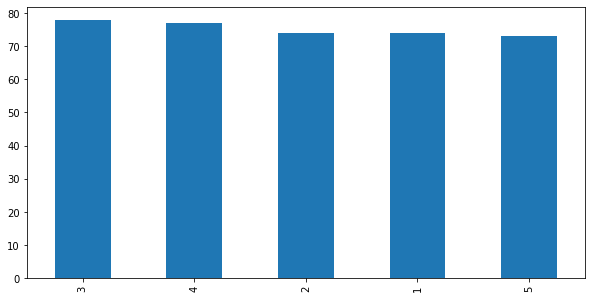

In [187]:
label_df = pd.DataFrame(data=y_train, columns=['label'])
fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
label_df['label'].value_counts().plot(kind='bar', ax=ax1)
plt.show()

# ***Model Klasifikasi***

In [188]:
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pickle

In [189]:
KNN_model_default = KNeighborsClassifier() #ini kalau diisi, fit tuningnya kosongin
KNN_model_default.fit(x_train, y_train)
y_pred_KNN_default =KNN_model_default.predict(x_valid)

In [190]:
print(classification_report(y_valid, y_pred_KNN_default,digits=4))

              precision    recall  f1-score   support

           1     0.5909    0.6500    0.6190        20
           2     0.6087    0.6667    0.6364        21
           3     0.6111    0.5789    0.5946        19
           4     0.6000    0.3529    0.4444        17
           5     0.5455    0.6667    0.6000        18

    accuracy                         0.5895        95
   macro avg     0.5912    0.5830    0.5789        95
weighted avg     0.5919    0.5895    0.5831        95

